# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import datasets
from sklearn.manifold import TSNE

# 方法1

C:\Users\user.DESKTOP-2LT8F45\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user.DESKTOP-2LT8F45\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


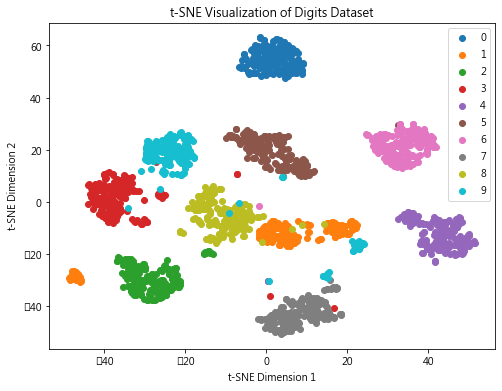

In [2]:
# 載入手寫數字數據集
digits = datasets.load_digits()
X = digits.data
y = digits.target

# 初始化t-SNE模型，指定降維到2維
tsne = TSNE(n_components=2, random_state=42)

# 對數據進行降維
embedded_data = tsne.fit_transform(X)

# 繪製降維後的數據
plt.figure(figsize=(8, 6))
for i in range(10):  # 對於每個數字類別，用不同顏色繪製
    indices = y == i
    plt.scatter(embedded_data[indices, 0], embedded_data[indices, 1], label=str(i))

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of Digits Dataset")
plt.legend()
plt.show()


# 方法2

Computing t-SNE embedding


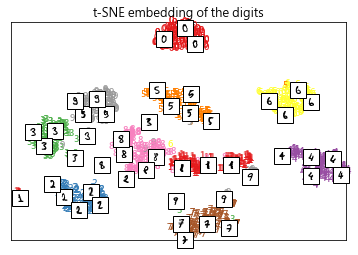

In [3]:
# 資料建模 並 視覺化 結果
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "t-SNE embedding of the digits")
plt.show()